In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vol_target import VolTarget, vol_of_vol
import pandas_datareader.data as reader

##모든 데이터의 출처는 kenneth library입니다.

In [12]:
%matplotlib inline
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(20,10)})

In [13]:
us = reader.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', '1926-07-01', '2021-07-31')[0][['Mkt-RF']] / 100

1926.07~2021.07 US Mkt-RF, Lagging & EWMA

<AxesSubplot:xlabel='Date'>

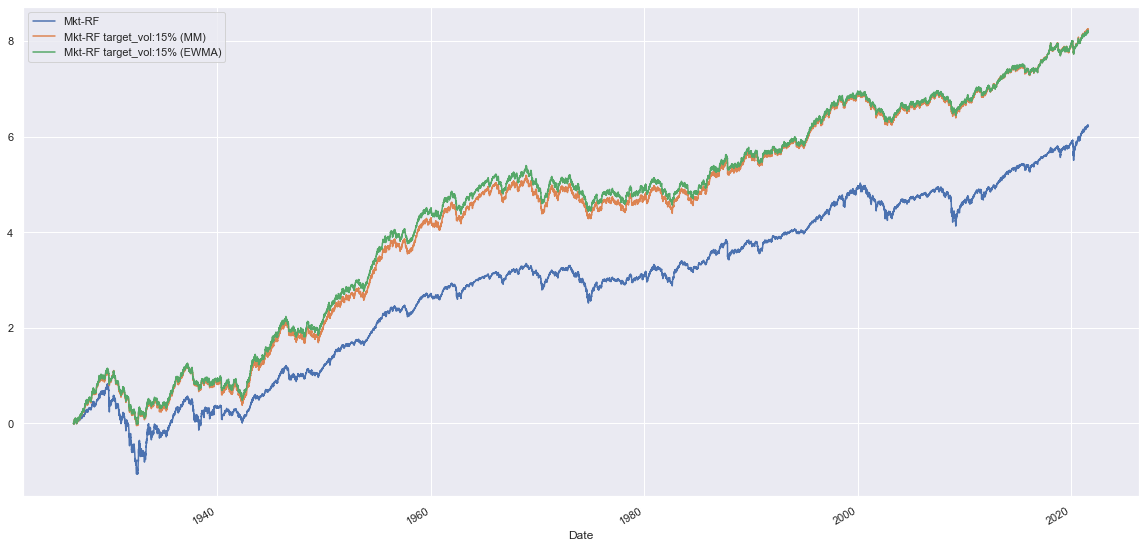

In [14]:
daily_15 = VolTarget(leverage_upper = 2, leverage_lower = 0.5, univariate_series = us, target_vol = 0.15, lagging_days = 2)

daily_15_mm = daily_15.vol_target_mm_maker(rolling_periods = 21)

us_vs_mm = pd.merge(np.log(1+us).iloc[3:].cumsum(), np.log(1+daily_15_mm).cumsum(), on = 'Date', how = 'inner')
us_vs_mm.columns = ['Mkt-RF', 'Mkt-RF target_vol:15% (MM)']

daily_15_ewma = daily_15.vol_target_ewma_maker()

us_vs_ewma = pd.merge(us_vs_mm, np.log(1+daily_15_ewma).cumsum(), on = 'Date', how = 'inner')
us_vs_ewma.columns = ['Mkt-RF', 'Mkt-RF target_vol:15% (MM)','Mkt-RF target_vol:15% (EWMA)']
us_vs_ewma.plot()

1990.07~2021.07 EU, JP, Asia ex JP Mkt-RF, Lagging & EWMA

1.유럽

In [15]:
eu = reader.DataReader('Europe_5_Factors_Daily', 'famafrench', '1990-07-01', '2021-07-31')[0][['Mkt-RF']] / 100

<AxesSubplot:xlabel='Date'>

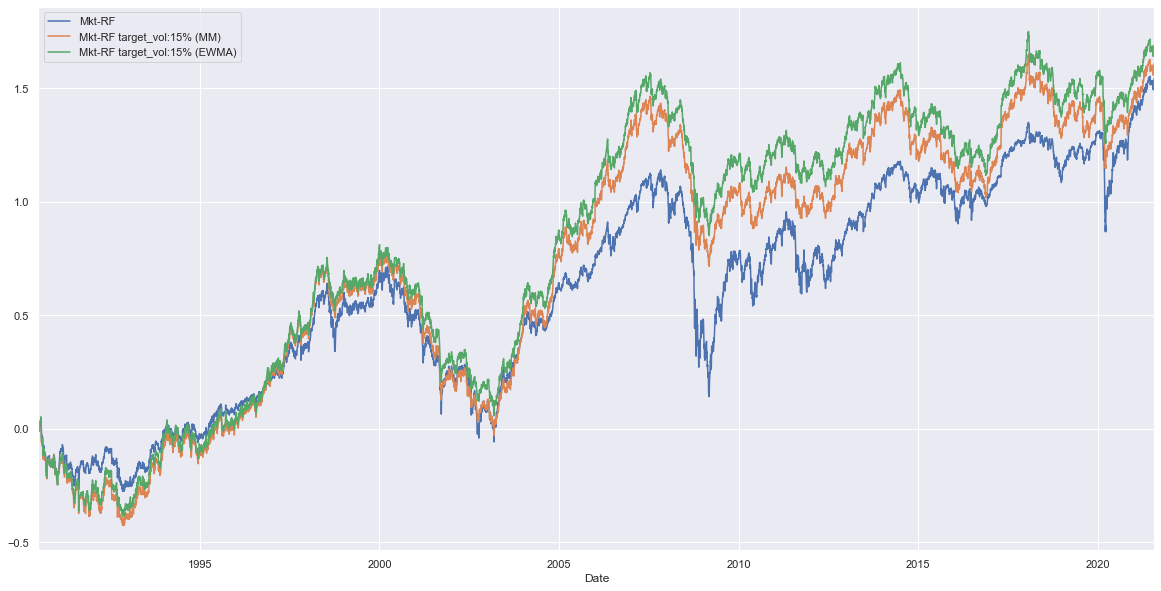

In [16]:
daily_15 = VolTarget(leverage_upper = 2, leverage_lower = 0.5, univariate_series = eu, target_vol = 0.15, lagging_days = 2)

daily_15_mm = daily_15.vol_target_mm_maker(rolling_periods = 21)

eu_vs_mm = pd.merge(np.log(1+eu).iloc[3:].cumsum(), np.log(1+daily_15_mm).cumsum(), on = 'Date', how = 'inner')
eu_vs_mm.columns = ['Mkt-RF', 'Mkt-RF target_vol:15% (MM)']

daily_15_ewma = daily_15.vol_target_ewma_maker()

eu_vs_ewma = pd.merge(eu_vs_mm, np.log(1+daily_15_ewma).cumsum(), on = 'Date', how = 'inner')
eu_vs_ewma.columns = ['Mkt-RF', 'Mkt-RF target_vol:15% (MM)','Mkt-RF target_vol:15% (EWMA)']
eu_vs_ewma.plot()

2. 일본

In [17]:
jp = reader.DataReader('Japan_5_Factors_Daily', 'famafrench', '1990-07-01', '2021-07-31')[0][['Mkt-RF']] / 100

<AxesSubplot:xlabel='Date'>

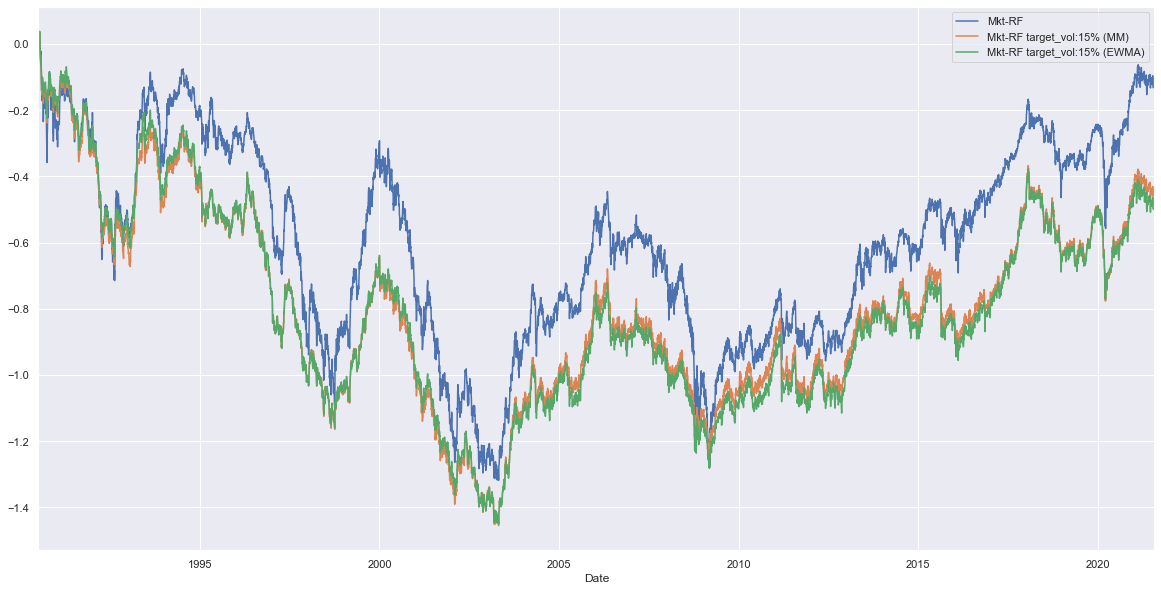

In [18]:
daily_15 = VolTarget(leverage_upper = 2, leverage_lower = 0.5, univariate_series = jp, target_vol = 0.15, lagging_days = 2)

daily_15_mm = daily_15.vol_target_mm_maker(rolling_periods = 21)

jp_vs_mm = pd.merge(np.log(1+jp).iloc[3:].cumsum(), np.log(1+daily_15_mm).cumsum(), on = 'Date', how = 'inner')
jp_vs_mm.columns = ['Mkt-RF', 'Mkt-RF target_vol:15% (MM)']

daily_15_ewma = daily_15.vol_target_ewma_maker(com = 10.65)

jp_vs_ewma = pd.merge(jp_vs_mm, np.log(1+daily_15_ewma).cumsum(), on = 'Date', how = 'inner')
jp_vs_ewma.columns = ['Mkt-RF', 'Mkt-RF target_vol:15% (MM)','Mkt-RF target_vol:15% (EWMA)']
jp_vs_ewma.plot()

3. 아시아 ex Japan

In [19]:
asia = reader.DataReader('Asia_Pacific_ex_Japan_5_Factors_Daily', 'famafrench', '1990-07-01', '2021-07-31')[0][['Mkt-RF']] / 100

<AxesSubplot:xlabel='Date'>

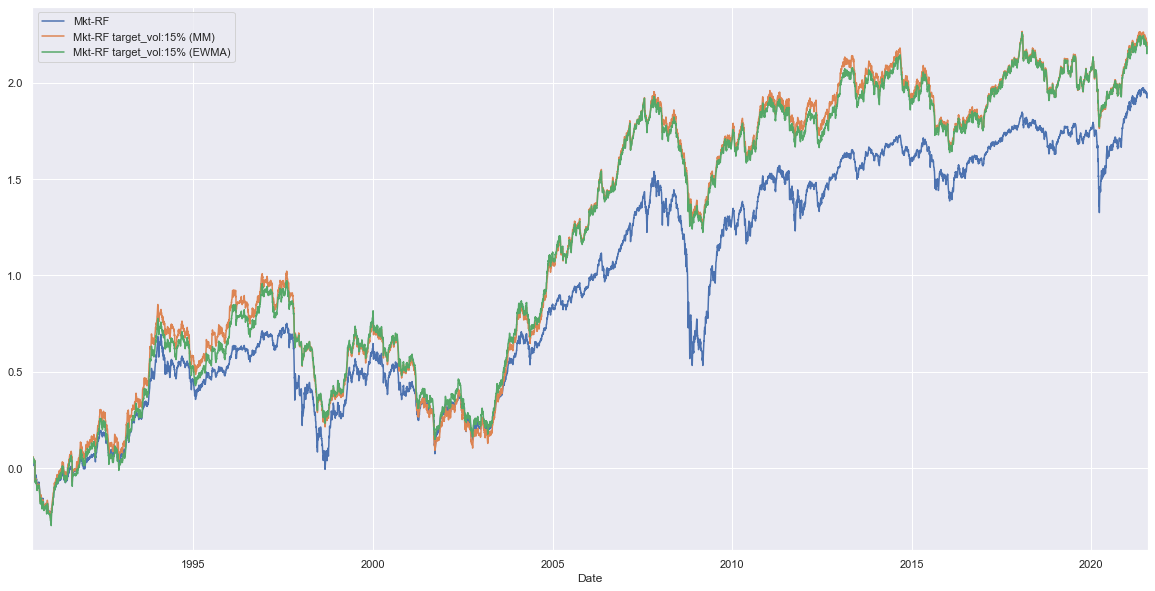

In [20]:
daily_15 = VolTarget(leverage_upper = 2, leverage_lower = 0.5, univariate_series = asia, target_vol = 0.15, lagging_days = 2)

daily_15_mm = daily_15.vol_target_mm_maker(rolling_periods = 21)

asia_vs_mm = pd.merge(np.log(1+asia).iloc[3:].cumsum(), np.log(1+daily_15_mm).cumsum(), on = 'Date', how = 'inner')
asia_vs_mm.columns = ['Mkt-RF', 'Mkt-RF target_vol:15% (MM)']

daily_15_ewma = daily_15.vol_target_ewma_maker()

asia_vs_ewma = pd.merge(asia_vs_mm, np.log(1+daily_15_ewma).cumsum(), on = 'Date', how = 'inner')
asia_vs_ewma.columns = ['Mkt-RF', 'Mkt-RF target_vol:15% (MM)','Mkt-RF target_vol:15% (EWMA)']
asia_vs_ewma.plot()